## Assignment 1: EDA

1. Read in `income.csv`
2. Convert the target, `SalStat` into a binary numeric variable called `target`, and build a bar chart that plots the frequency of each value.
3. Explore the numeric features using histograms or boxplots.
4. Explore the categorical features using bar charts.
5. Consider writing functions for steps 3 and 4.

In [ ]:
import os
os.listdir('/content')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

income = pd.read_csv("income.csv")
income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
income['target'] = np.where(income['SalStat'] == ' less than or equal to 50,000',0,1)
income['target'].head()

,target
0,0
1,0
2,1
3,0
4,0


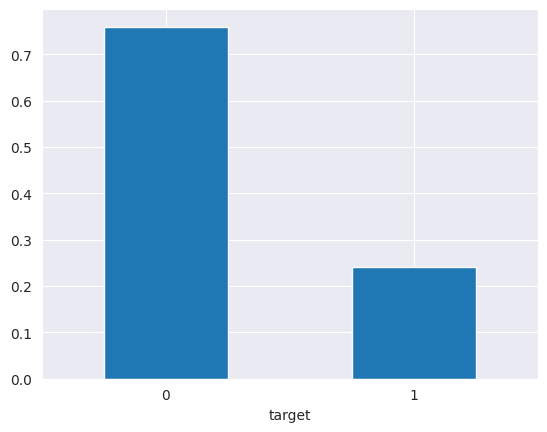

In [ ]:
income['target'].value_counts(normalize=True).plot(kind = 'bar' , rot=0 )
plt.show()

In [ ]:
income.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
 13  target         31978 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 20.2 MB


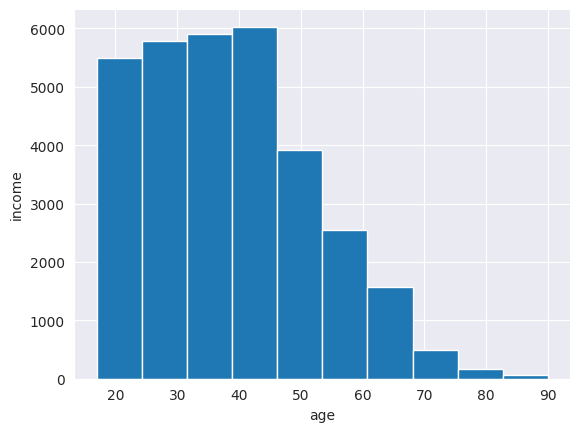

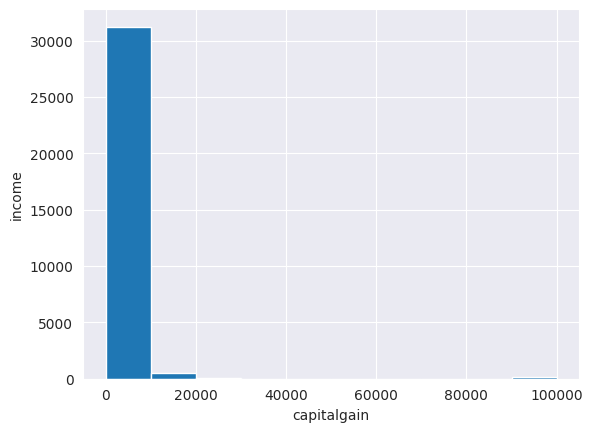

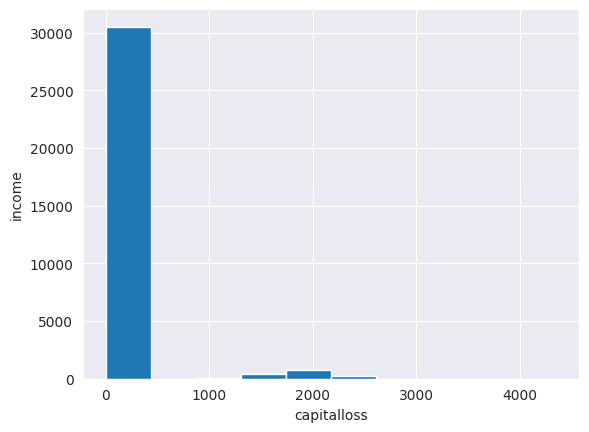

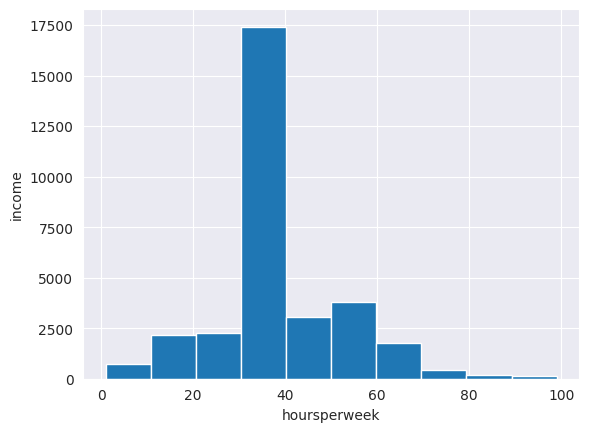

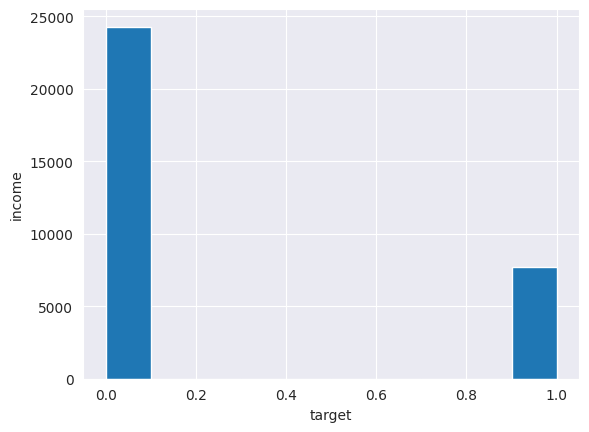

In [ ]:
for numeric_col in income.select_dtypes(include ='number').columns:
  (
      income[numeric_col].
      plot(kind = 'hist').
      set(xlabel = numeric_col , ylabel = 'income')
  )
  plt.show()

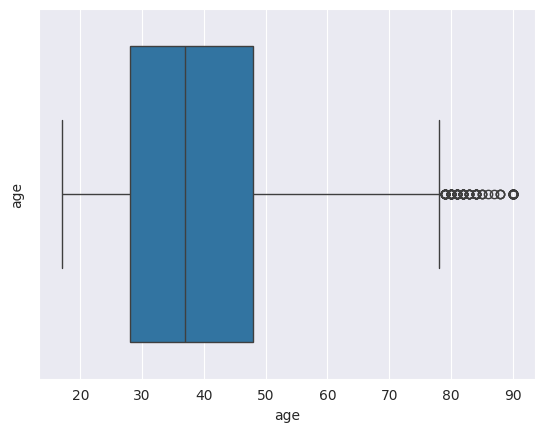

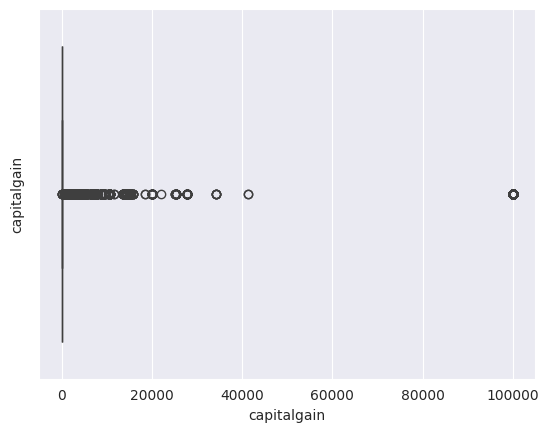

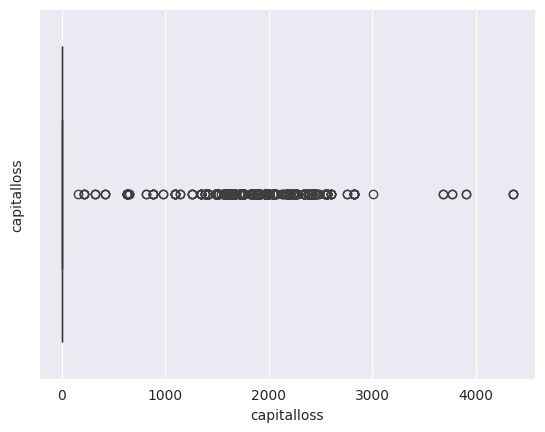

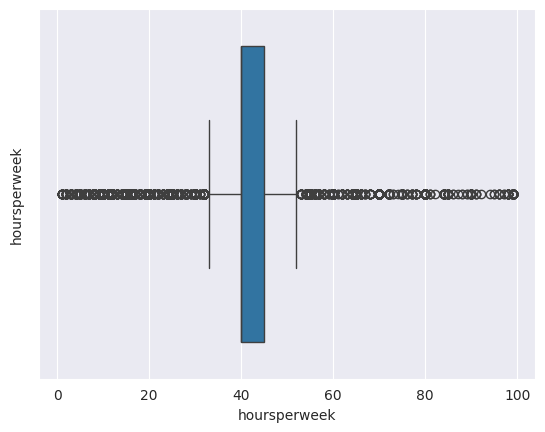

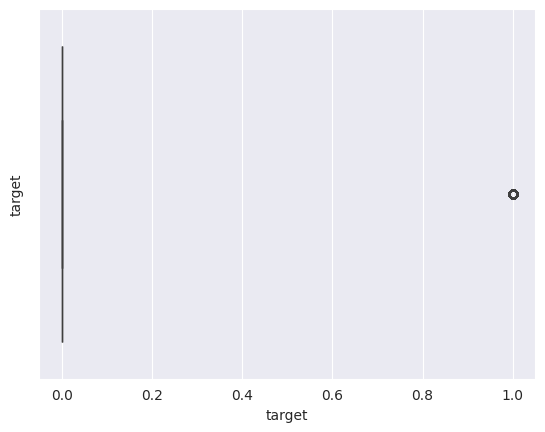

In [ ]:
for numeric_col in income.select_dtypes(include ='number').columns:
  (sns.boxplot(income[numeric_col] , orient = 'h')
  .set(ylabel = numeric_col)
  )
  plt.show()

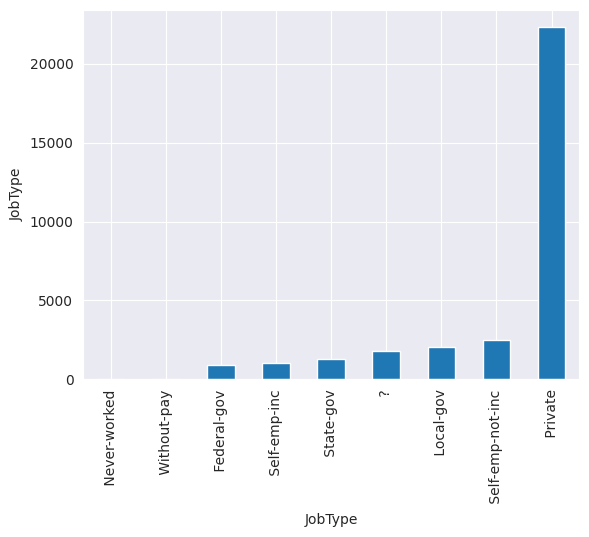

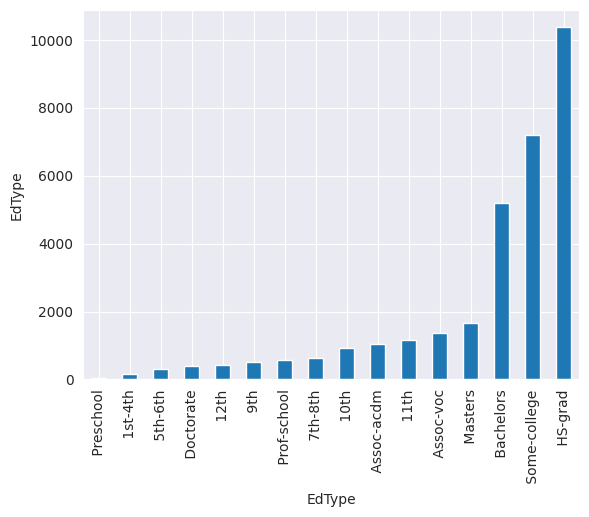

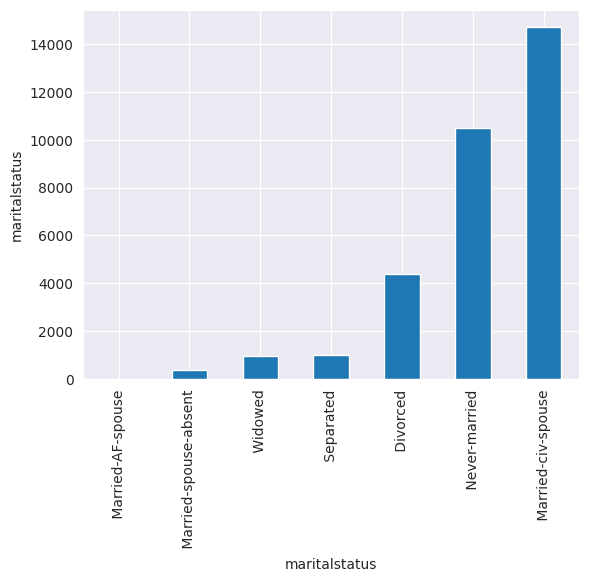

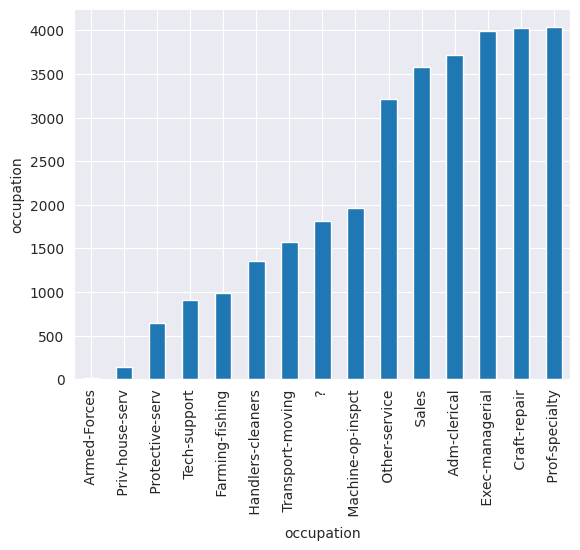

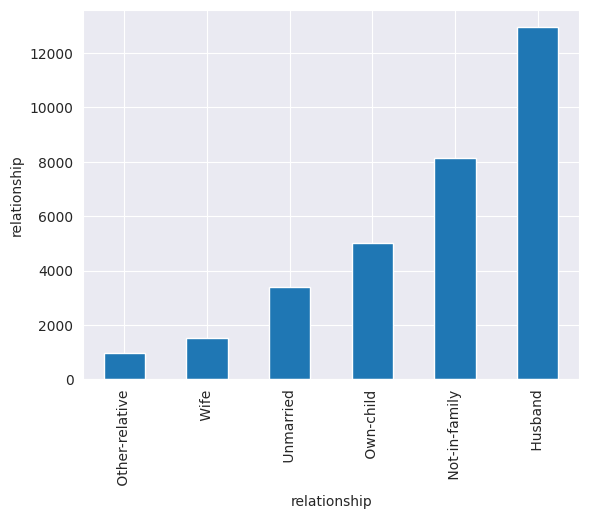

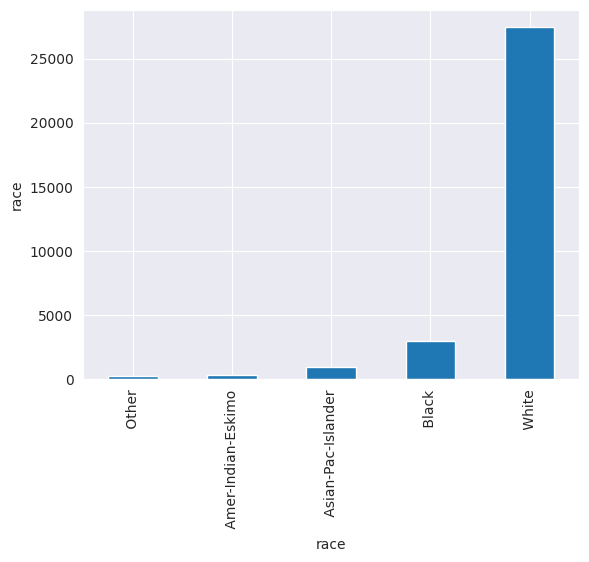

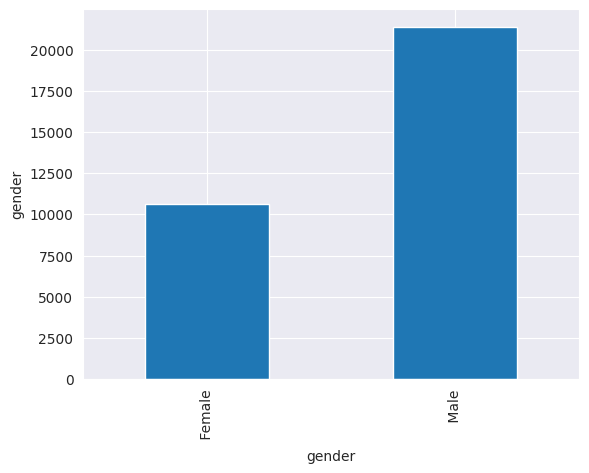

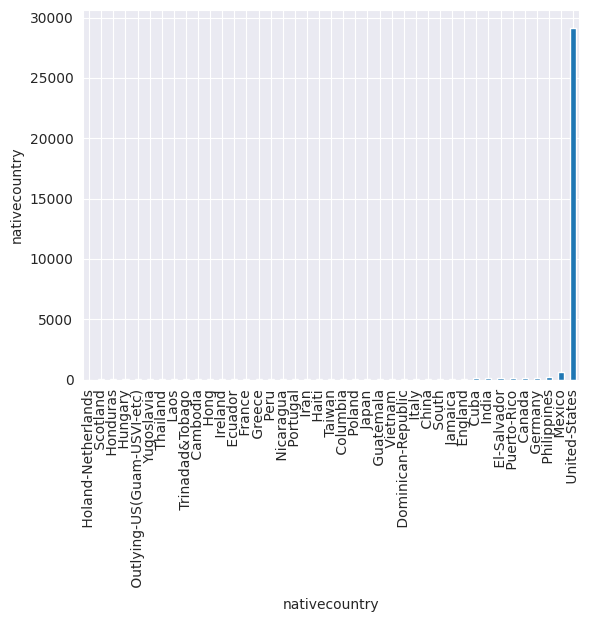

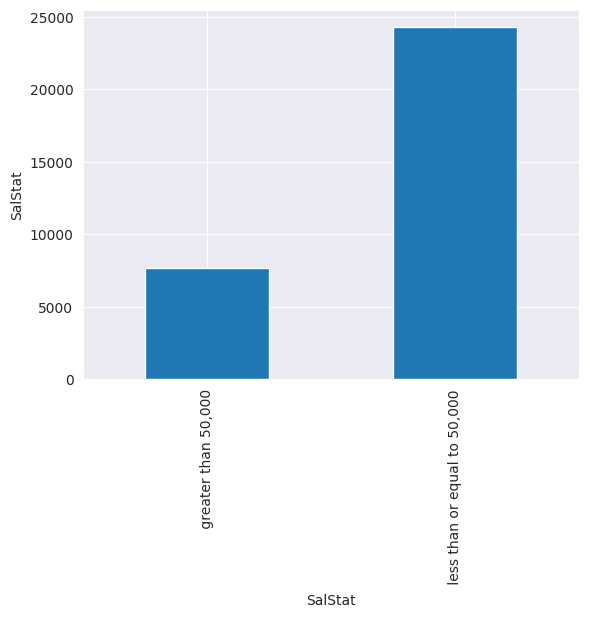

In [ ]:
for column in income.select_dtypes('object').columns:
  (income[column].
   value_counts().
   sort_values(ascending=True).
   plot.bar().
   set(xlabel = column , ylabel = column))
  plt.show()

In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
 13  target         31978 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.4+ MB


## Assignment 2: Exploring Relationships

1. Build a Correlation Matrix Heatmap
2. Build a Pairplot
3. Write a function that calculates the mean target rate for each level of categorical variables.

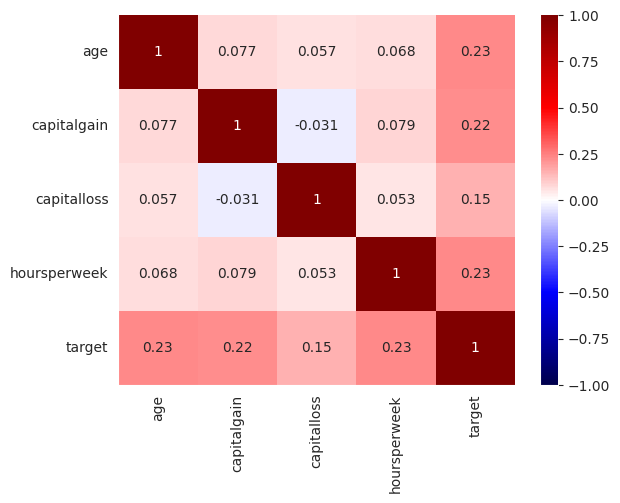

In [ ]:
sns.heatmap(
  income.corr(numeric_only=True),
  vmin = -1,
  vmax = +1,
  cmap = 'seismic',
  annot = True
)
sns.despine()

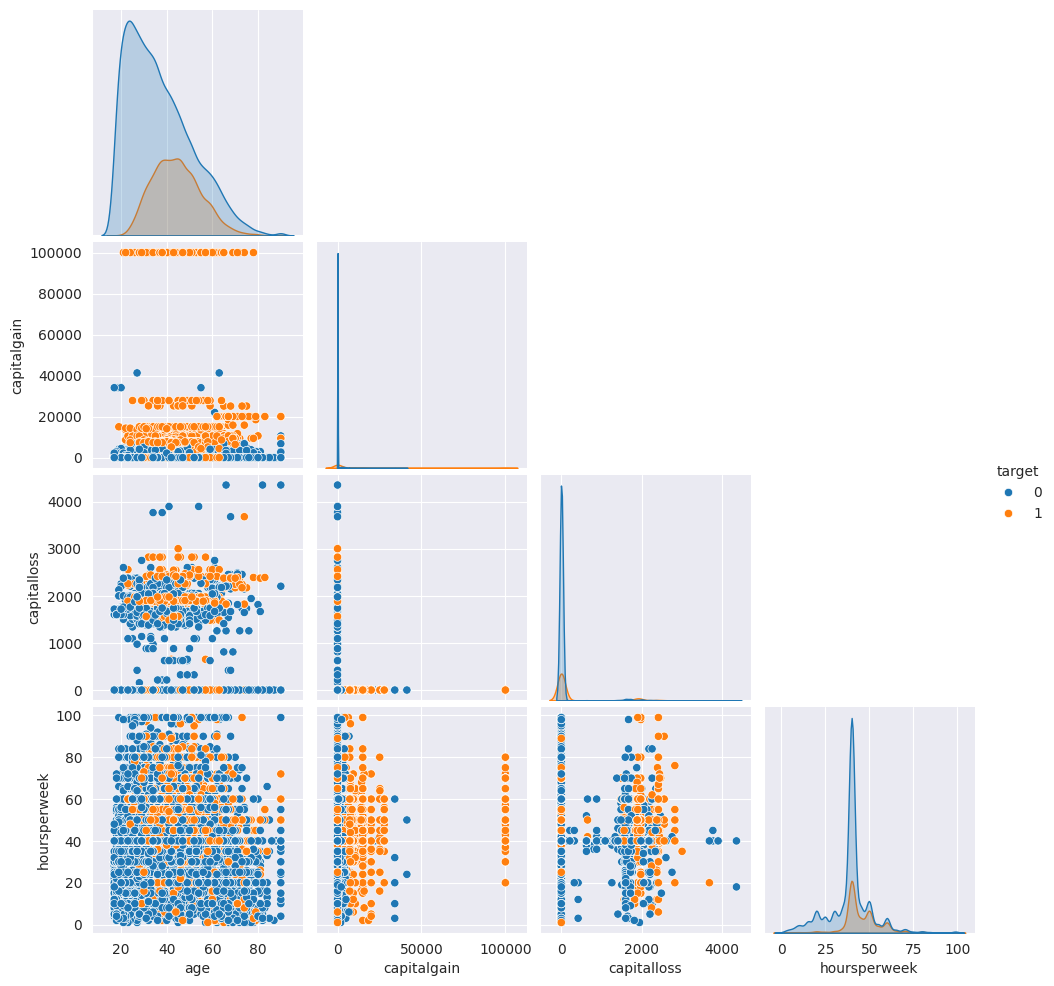

In [ ]:
sns.pairplot(data = income , hue = "target" , corner = True)
sns.despine()

In [ ]:
def cat_plotter(df,target):
    for col in df.select_dtypes(['object']).columns:
      sns.barplot(
          data = (
              df.groupby(col , as_index = True)
              .agg({target :"mean"})
              .sort_values(by = target , ascending = False)
            ),
          x= col,
          y = target
          )
      plt.xticks(rotation = 90)
      plt.show()


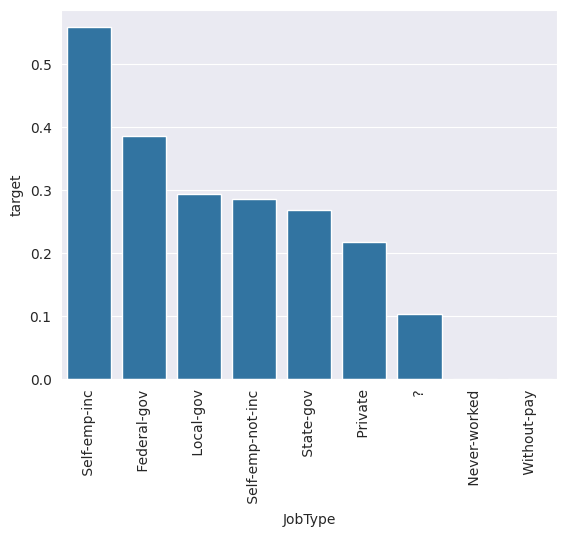

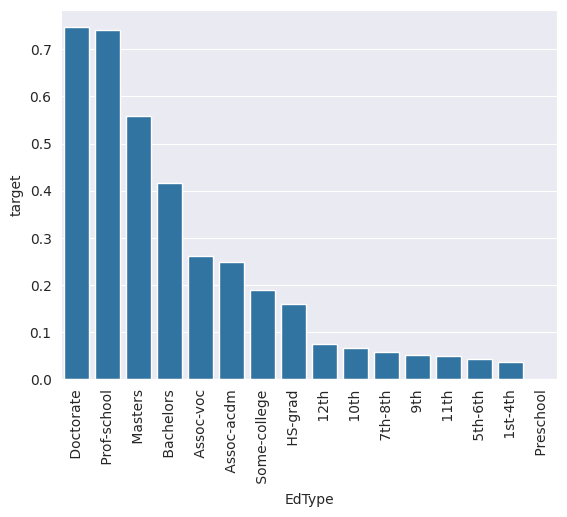

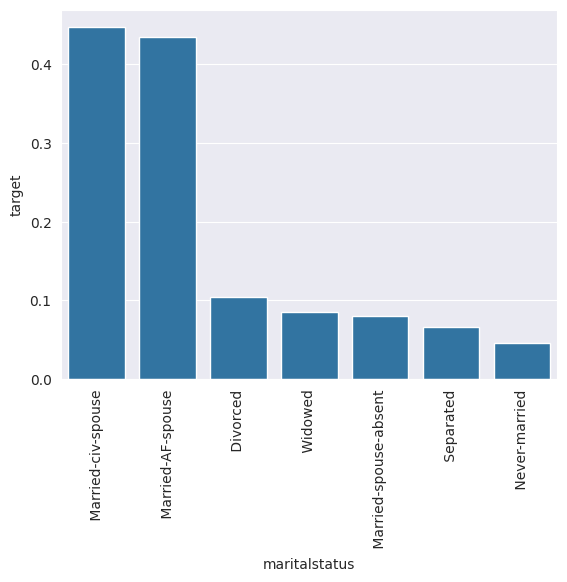

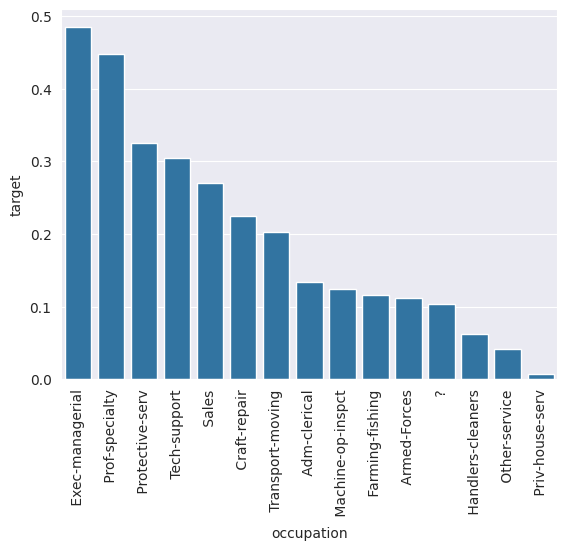

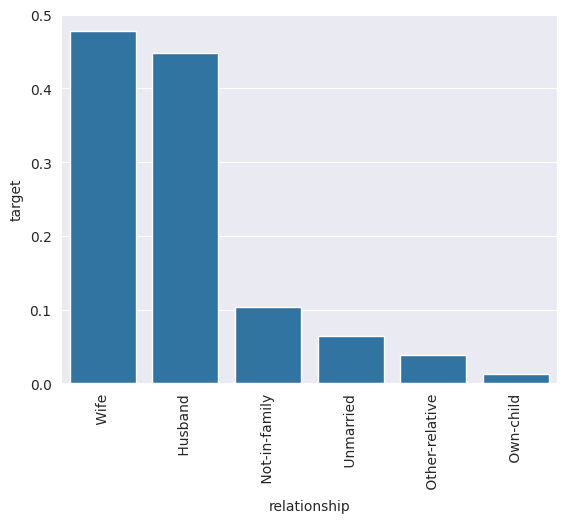

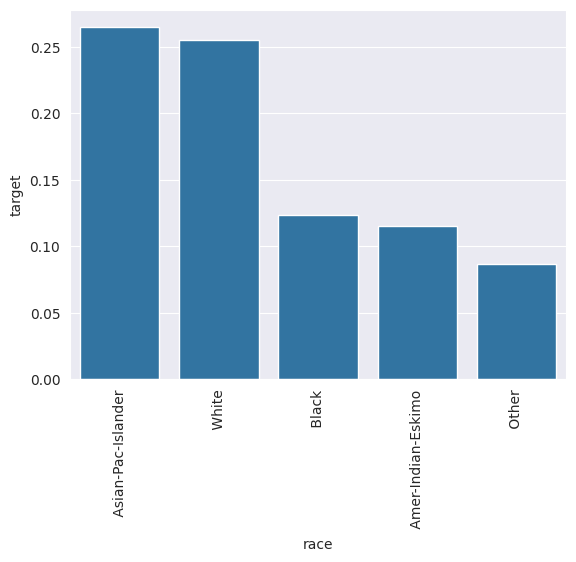

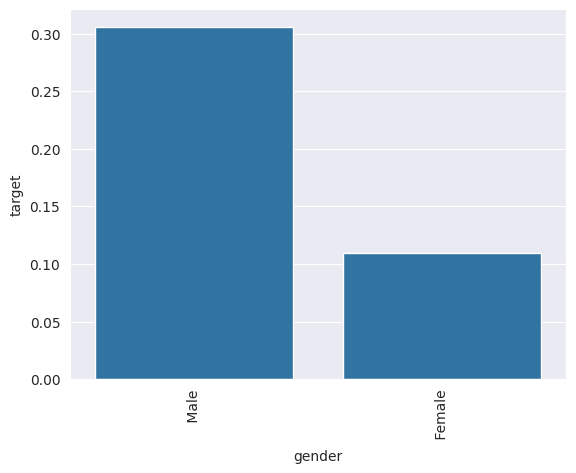

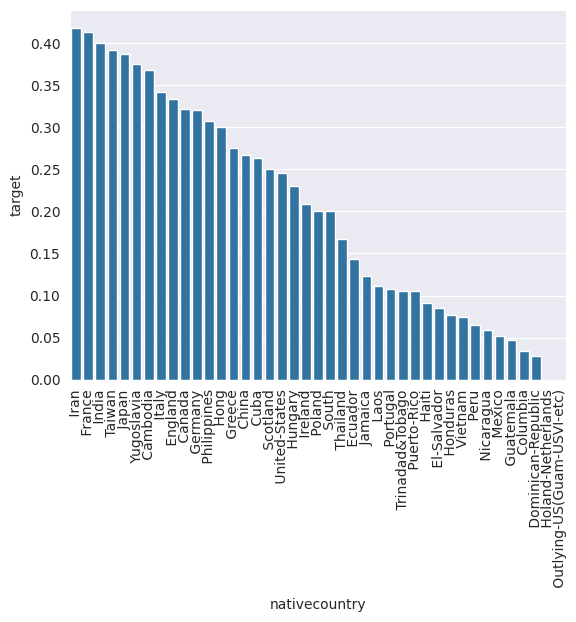

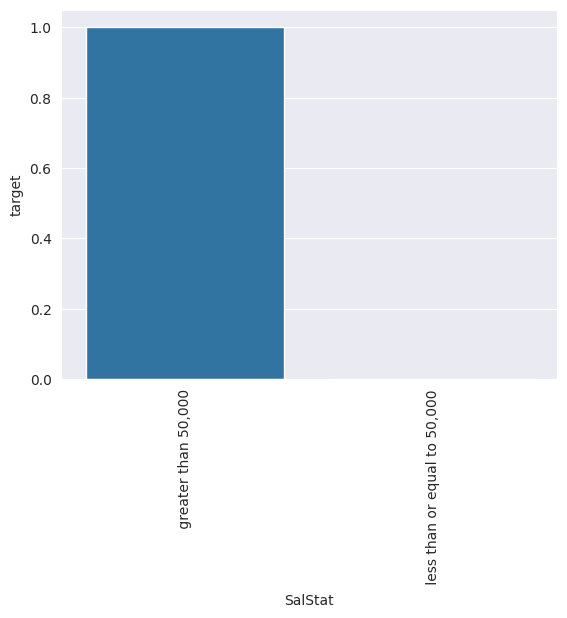

In [ ]:
cat_plotter(income , "target")

In [ ]:
#Write a function that calculates the mean target rate for each level of categorical variables.

def mean_target_cat_columns(df,target):
  for col in df.select_dtypes('object').columns:
    (
        df
        .groupby(col , as_index = True)
        .agg({target:"mean"})
        .sort_values(by = target , ascending = False)
        .plot(kind = 'bar', rot = 90)
    )
    plt.xlabel(col)
    plt.show()


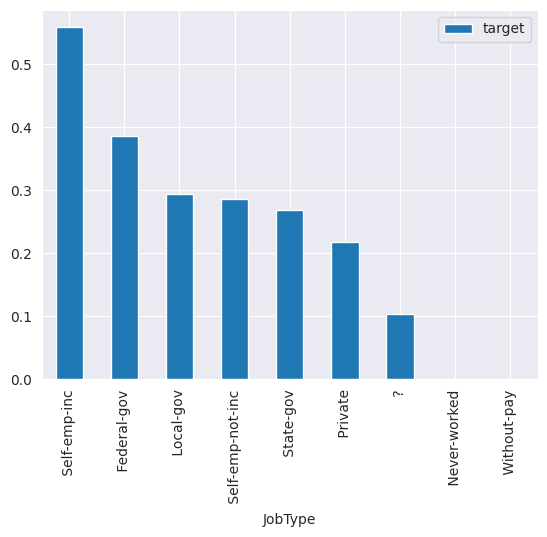

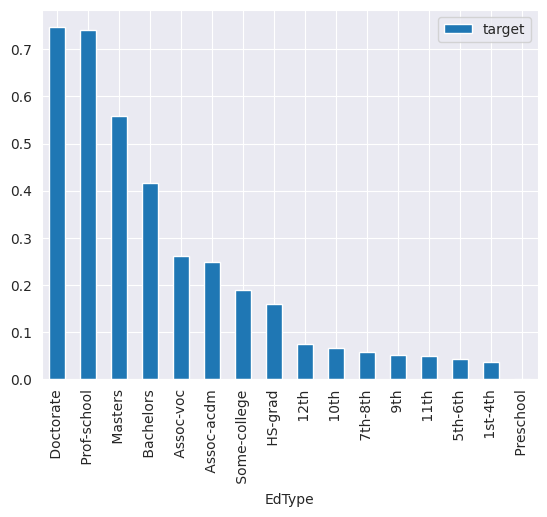

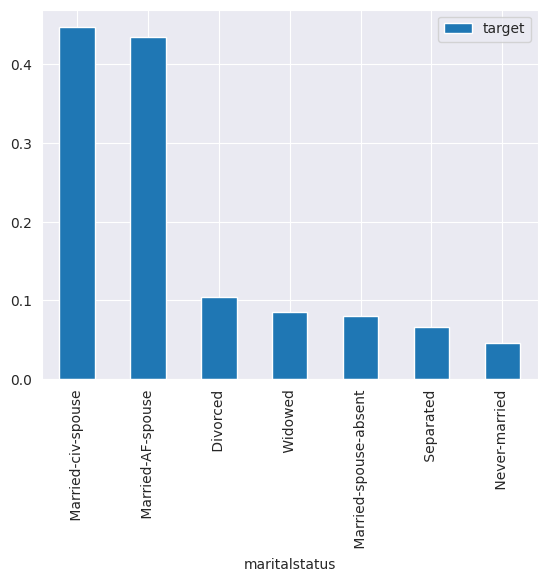

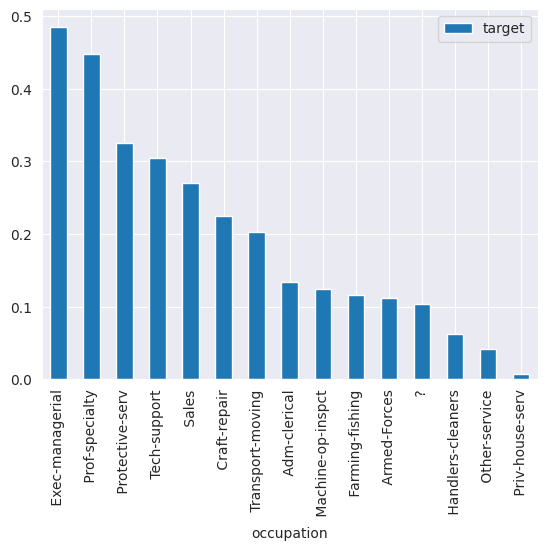

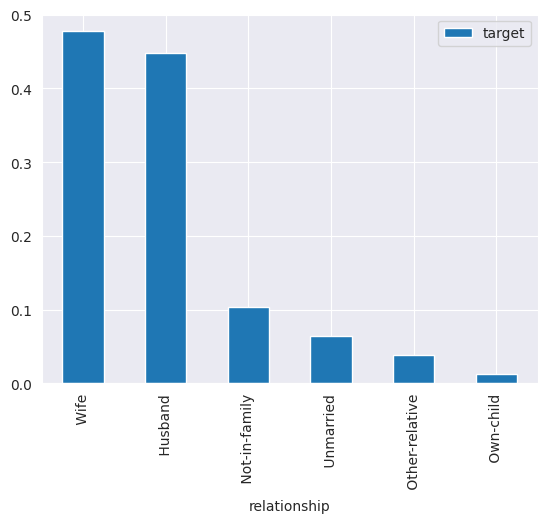

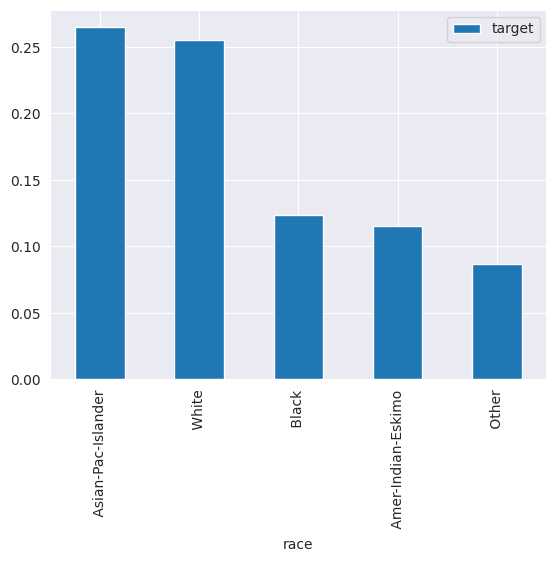

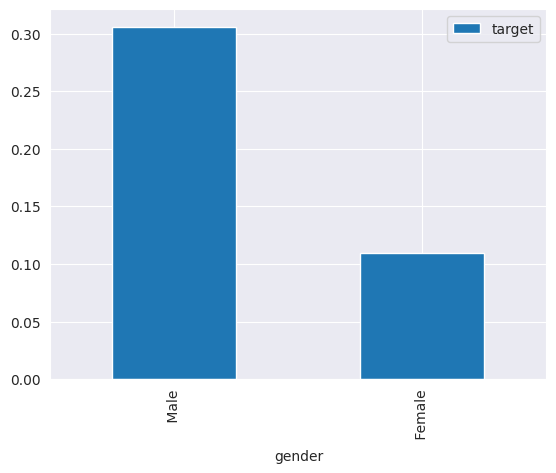

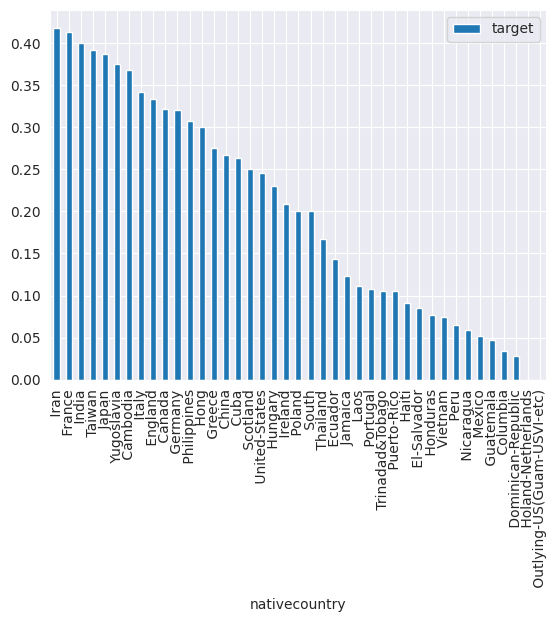

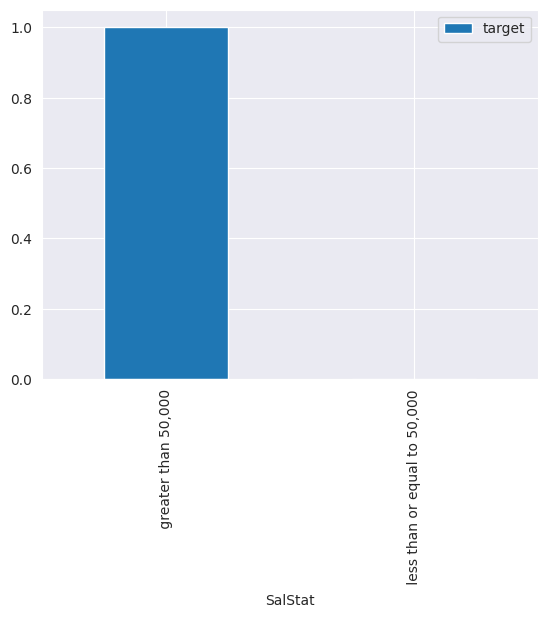

In [ ]:
mean_target_cat_columns(income , target = "target")

## Assignment 3: Data Prep

1. Create Dummy Variables for the categorical features - check value counts to determine if any categories need to be grouped. If there are less than 10 rows in a category, group it with a larger one.
2. Split off 20% of the data to hold out as a test set, and use the rest for training. There should be 4 datasets, one each for the features and target for the train and test sets.

In [ ]:
income.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,target
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000",1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",0


## Value counts function

In [ ]:
def Val_Counts(df):
  for column in df.select_dtypes('object').columns:
    print(df[column].value_counts(), end ='\n'+'-'*40+'\n')

In [ ]:
Val_Counts(df = income)

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64
----------------------------------------
EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64
----------------------------------------
maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: count, dtype: int64
--------

In [ ]:
Categorical_Columns = [col for col in income.select_dtypes('object').columns]
Categorical_Columns

['JobType',
 'EdType',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'gender',
 'nativecountry',
 'SalStat']

In [ ]:
income_OneHeated = income[Categorical_Columns].drop(['SalStat'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(income_OneHeated, drop_first = True)
y = income['target']
X_train,y_train,X_test,y_test = train_test_split(X,y ,
                                                 test_size = 0.2 ,
                                                 random_state = 2025)
splitting_df = pd.DataFrame({"X_train":X_train.shape[0],
                         "X_test":X_test.shape[0],
                         "y_train":y_train.shape[0],
                         "y_test":y_test.shape[0]},
                         index =['Count'])
splitting_df.T

,Count
X_train,25582
X_test,25582
y_train,6396
y_test,6396


### for binning the countries together.

In [ ]:
import pandas as pd

In [ ]:
income.info(show_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
 13  target         31978 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 20.2 MB


In [ ]:
categorical_columns = [col for col in income.drop(['SalStat'], axis =1).select_dtypes('object')]
categorical_columns

['JobType',
 'EdType',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'gender',
 'nativecountry']

In [ ]:
income["JobType"].value_counts()

,count
JobType,
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
?,1809
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14
Never-worked,7


In [ ]:
JobType_map ={"Never-worked" : "Without_Pay",
              "Without-pay": "Without-Pay"
              }

EducationType_map = {"12th": "Secondary",
                     "11th": "Secondary",
                     "10th": "Secondary",
                     "9th" : "Secondary",
                     "7th-8th": "Secondary",
                     "5th-6th" : "Secondary",
                     "1st-4th" : "Secondary"
                     }
maritslstatus_map = {"Never-married": "Single",
                     "Seperated":"seperated",
                     "Divorced":"seperated",
                     "Married-spouse-absent": "seperated",
                     }
relationship_map = {"Wife":"Married",
                    "Husband":"Married",
                    "Not-in-family":"unmarried",
                    "Unmarried":"unmarried",
                    "Other-relative": "Unmarried",
                    }

native_country_map = {}
labels = ['<0.05' ,
          '0.05-0.1',
          '0.1-0.15',
          '0.15-0.2',
          '0.2-0.25',
          '0.25-0.3',
          '0.3-0.35',
          '0.35-0.4',
          '>0.4'
          ]
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

In [ ]:
sorted(income["nativecountry"].value_counts().to_frame().index.to_list())

[' Cambodia',
 ' Canada',
 ' China',
 ' Columbia',
 ' Cuba',
 ' Dominican-Republic',
 ' Ecuador',
 ' El-Salvador',
 ' England',
 ' France',
 ' Germany',
 ' Greece',
 ' Guatemala',
 ' Haiti',
 ' Holand-Netherlands',
 ' Honduras',
 ' Hong',
 ' Hungary',
 ' India',
 ' Iran',
 ' Ireland',
 ' Italy',
 ' Jamaica',
 ' Japan',
 ' Laos',
 ' Mexico',
 ' Nicaragua',
 ' Outlying-US(Guam-USVI-etc)',
 ' Peru',
 ' Philippines',
 ' Poland',
 ' Portugal',
 ' Puerto-Rico',
 ' Scotland',
 ' South',
 ' Taiwan',
 ' Thailand',
 ' Trinadad&Tobago',
 ' United-States',
 ' Vietnam',
 ' Yugoslavia']

In [ ]:
income = income.assign(
        target_0 = np.where(income['target'] == 0 , 1,0),
        target_1 = np.where(income['target'] == 1 , 1,0),
    )

In [ ]:
income.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,target,target_0,target_1
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000",0,1,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000",0,1,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000",1,0,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000",0,1,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000",0,1,0


In [ ]:
df2 = (
    income[['nativecountry','target']].assign(
        target_0 = np.where(income['target'] == 0 , 1,0),
        target_1 = np.where(income['target'] == 1 , 1,0),
    )
    .groupby(by = 'nativecountry')
    .agg({"target":"count" ,
          "target_0":"sum",
          "target_1":"sum"})
    .sort_values(by = 'target',ascending = False)
)

In [ ]:
df2.columns

Index(['target', 'target_0', 'target_1'], dtype='object')

In [ ]:
df2 = df2.assign(target_probaility = np.round(df2['target_1']/df2['target'],2))
df2.sort_values(by = ['target_probaility'], ascending=False).head(3)

,target,target_0,target_1,target_probaility
nativecountry,,,,
Iran,43,25,18,0.42
France,29,17,12,0.41
India,100,60,40,0.40


In [ ]:
df2['target_probaility'].sort_values().unique()

array([0.  , 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.11, 0.12, 0.14, 0.17,
       0.2 , 0.21, 0.23, 0.25, 0.26, 0.27, 0.28, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42])

In [ ]:
bins = [0]
for bin in bins:
  if bin<=0.4:
    bins.append(round(bin + 0.05,2))
  else:
    bins
bins

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

In [ ]:
bins.index(0.4)

8

In [ ]:
for i in range(len(bins)):
  print(i , end=' ')

0 1 2 3 4 5 6 7 8 9 

In [ ]:
for i in range(len(bins)-3):
  print(i , end=' ')

0 1 2 3 4 5 6 

In [ ]:
labels1 = [f"{bins[i+1]}-{bins[i+2]}" for i in range(len(bins)-3)]
# labels1[0] = '<0.05'
# labels1[-1] = '>0.4'
labels1.insert(len(labels1),'>0.4')
labels1.insert(0,'<0.05')
labels1

['<0.05',
 '0.05-0.1',
 '0.1-0.15',
 '0.15-0.2',
 '0.2-0.25',
 '0.25-0.3',
 '0.3-0.35',
 '0.35-0.4',
 '>0.4']

In [ ]:
labels1.insert(len(labels1),'>0.4')
labels1.insert(0,'<0.05')
labels1

['<0.05',
 '0.05-0.1',
 '0.1-0.15',
 '0.15-0.2',
 '0.2-0.25',
 '0.25-0.3',
 '0.3-0.35',
 '0.35-0.4',
 '>0.4']

In [ ]:
labels = ['<0.05' ,
          '0.05-0.1',
          '0.1-0.15',
          '0.15-0.2',
          '0.2-0.25',
          '0.25-0.3',
          '0.3-0.35',
          '0.35-0.4',
          '>0.4'
          ]

In [ ]:
len(bins),len(labels)

(10, 9)

In [ ]:
df2 = df2.assign(
    countries_bin = pd.cut(df2['target_probaility'], bins= bins , labels=labels)
)

In [ ]:
nativecountry_map = {""}

In [ ]:
df2[df2['countries_bin'] == '<0.05'].index

Index(['Mexico', 'Dominican-Republic', 'Guatemala', 'Columbia'], dtype='object', name='nativecountry')

In [ ]:
df2

,target,target_0,target_1,target_probaility,countries_bin
nativecountry,,,,,
United-States,29170,21999,7171,0.25,0.2-0.25
Mexico,643,610,33,0.05,<0.05
Philippines,198,137,61,0.31,0.3-0.35
Germany,137,93,44,0.32,0.3-0.35
Canada,121,82,39,0.32,0.3-0.35
Puerto-Rico,114,102,12,0.11,0.1-0.15
El-Salvador,106,97,9,0.08,0.05-0.1
India,100,60,40,0.40,0.35-0.4
Cuba,95,70,25,0.26,0.25-0.3


In [ ]:
df2[df2['countries_bin'] == '0.2-0.25']

,target,target_0,target_1,target_probaility,countries_bin
nativecountry,,,,,
United-States,29170,21999,7171,0.25,0.2-0.25
Ireland,24,19,5,0.21,0.2-0.25
Hungary,13,10,3,0.23,0.2-0.25
Scotland,12,9,3,0.25,0.2-0.25


In [ ]:
(
    income
    .groupby(by = "nativecountry")
    .agg({"target":"count"})
    .sort_values(by = "target", ascending = False)
    )


,target
nativecountry,
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


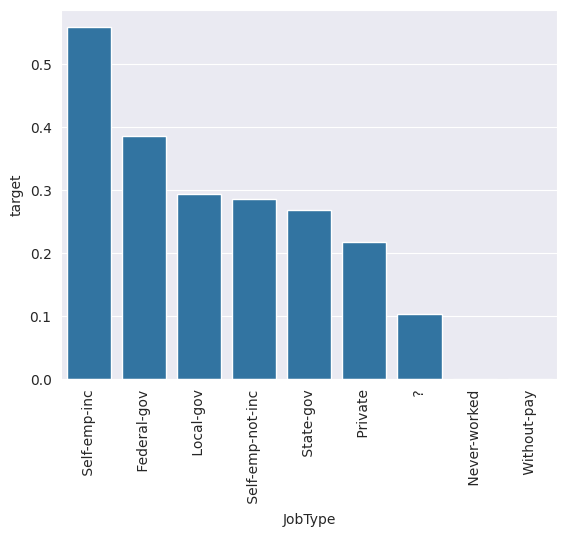

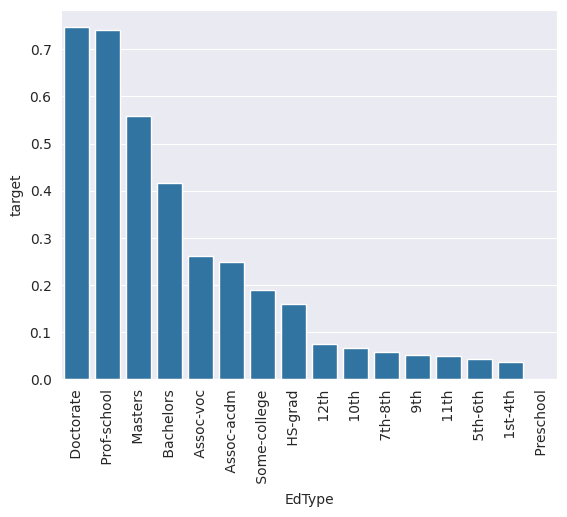

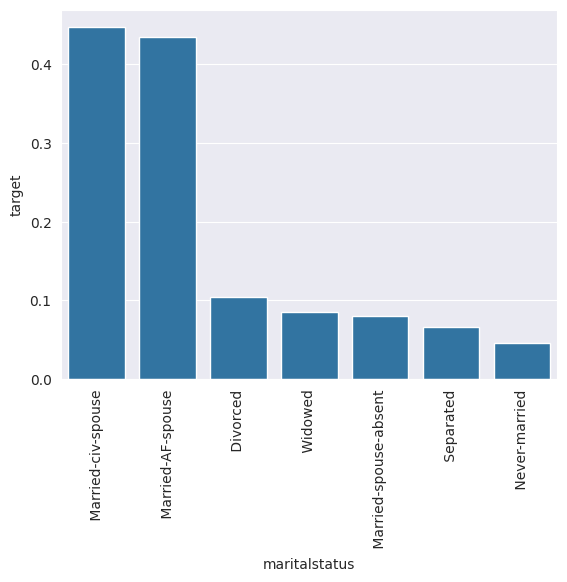

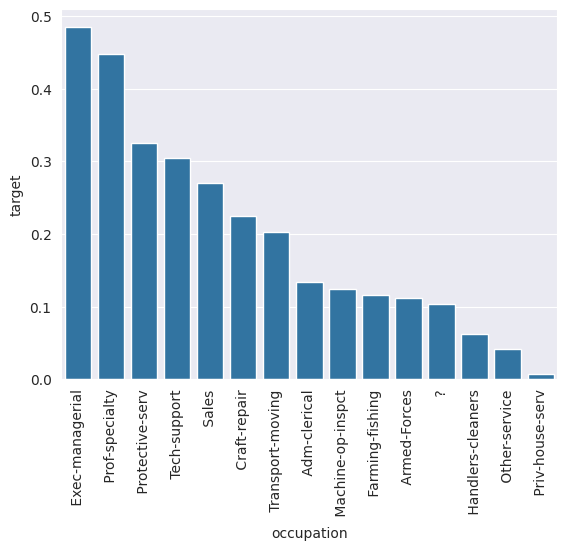

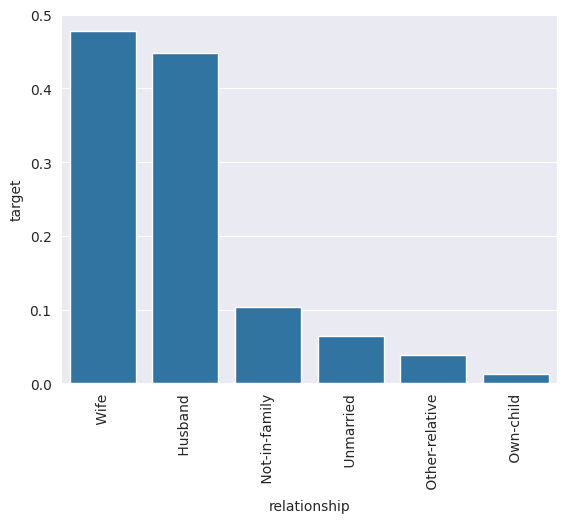

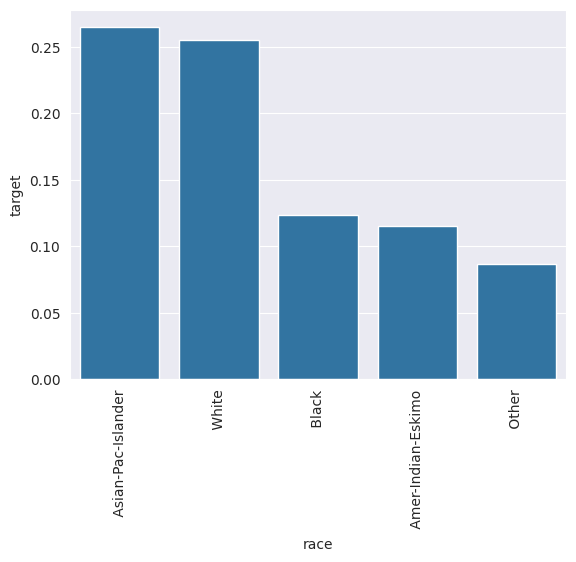

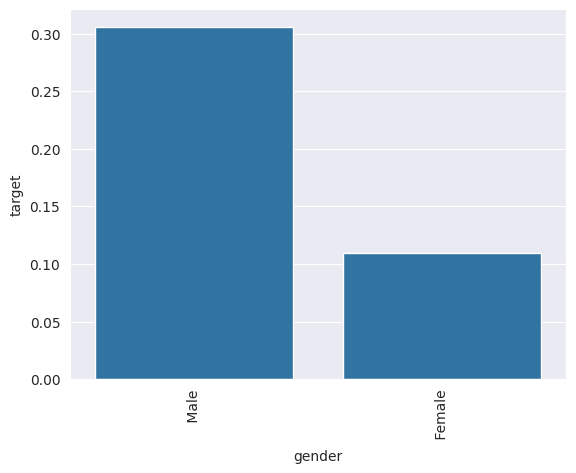

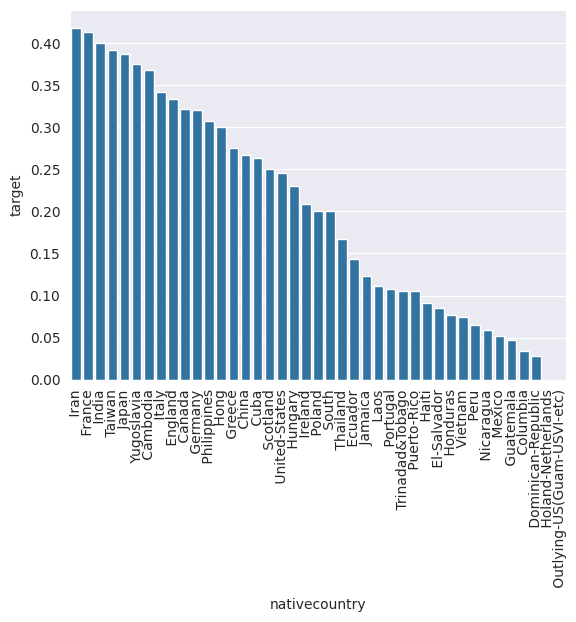

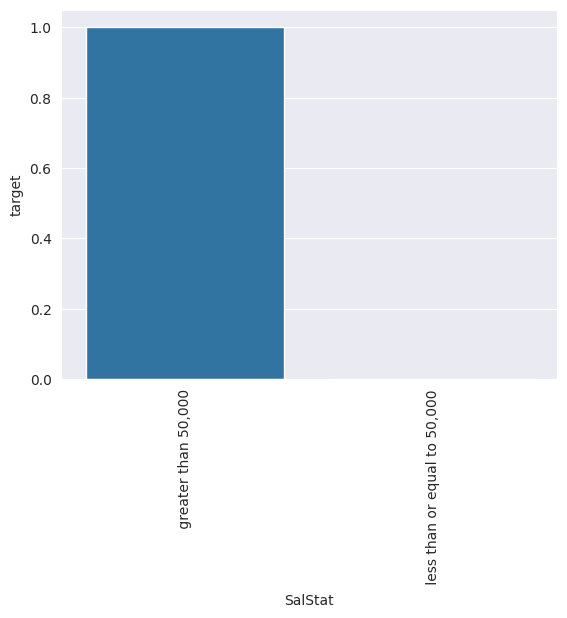

In [ ]:
cat_plotter(income , target = 'target')